# <center> K-Means  </center>



**Source :** Aurélien Vannieuwenhuyze, *Intelligence artificielle vulgarisée, le Machine Learning et le Deep Learning par la pratique*, ENI, Paris, 2019, p.251-262

**Objectif :**
    
Nous avons deux sortes de fruits, des abricots et des cerises : nous allons entraîner un modèle pour différencier et classer les fruits.

L'algorithme K-Means est un algorithme non supervisé, qui procède par *clustering*.

## Importations

In [74]:
import pandas as pd
import random
import matplotlib.pyplot as plt
#Suppression des erreurs de type warning
import warnings
warnings.filterwarnings('ignore')

## Préparation des données

Nous générons notre propre jeu de données. Nous définissons d'abord les caractéristiques propres aux fruits.

In [75]:
# Caractéristiques des cerises :
# diamètre minimal, diamètre maximal, poids minimal, poids maximal
carac_cerise = [ [17, 19, 1, 5], [20 , 21 , 5 , 6], [22, 23 , 6 , 7], 
                [24, 25, 7, 8.5], [26, 27, 8.5, 10], [28 , 29 , 10, 11.5] ]

# Caractéristiques des abricots :
# diamètre minimal, diamètre maximal, poids moyen
carac_abricot = [ [40, 44 , 41], [45, 49 , 54], [50, 54 , 74], [55, 59 , 100] ]

### Génération des données

In [76]:
# notre nombre d'observations
nb_fruits = 2000

### Génération des cerises

In [77]:
cerises = []
random.seed()

for iteration in range(nb_fruits):
    
    # choix au hasard d' une caractéristique
    cerise= random.choice(carac_cerise)
    
    # Génération d' un diamètre
    diametre = round(random . uniform(cerise[0] , cerise[1]) , 2)
    
    # Génération d'un poids
    poids= round(random.uniform(cerise[2] , cerise[3]),2)
    
#     print ("Cerise " +str(iteration)+" " +str(cerise)+ " : " + str(diametre)+ " - "+str(poids))
    cerises.append([diametre,poids])

### Génération des abricots

In [78]:
abricots = []
random.seed ()

for iteration in range(nb_fruits):
    
    #choix au hasard d'une caractéristique
    abricot= random.choice(carac_abricot)
    
    #Génération d'un diamètre
    diametre = round(random.uniform(abricot[0] , abricot[1]),2)
    
    #Génération d'un poids compris entre -10% et + 10 % du poids moyen
    borneMinPoids = abricot[2] / 1.10 
    borneMaxPoids = abricot[2] * 1.10
    poids= round(random.uniform(borneMinPoids , borneMaxPoids), 2)
    
#     print("Abricot " +str(iteration)+" "+str(abricot)+ " : " + str(diametre) + "- " + str(poids))
    abricots.append([diametre , poids])

### Concaténation des données

In [79]:
# Constitution des observations
fruits = cerises+abricots
# print(fruits)

### Conversion en df puis en csv

In [21]:
#Mélange des observations
random.shuffle(fruits)

# conversion en df
my_df = pd.DataFrame(fruits)
my_df.to_csv("fruits.csv", index=False , header=False)

## Chargement des données

In [24]:
df = pd.read_csv("fruits.csv", names=['DIAMETRE', 'POIDS'], header=None)
df.head()

,DIAMETRE,POIDS
0,24.90,8.33
1,58.93,97.83
2,28.62,10.90
3,47.05,50.26
4,50.88,76.77


## Visualisation des données

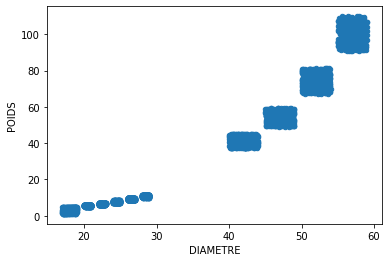

In [52]:
df.plot.scatter(x="DIAMETRE", y="POIDS" )
plt.show()

## Entraînement du modèle

In [30]:
from sklearn.cluster import KMeans

modele = KMeans(n_clusters=2)

In [31]:
# apprentissage
modele.fit(df)

KMeans(n_clusters=2)

## Prédiction

In [32]:
predictions_kmeans = modele.predict(df)

## Visualisation

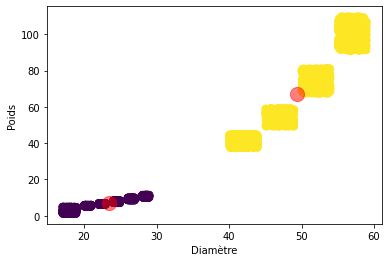

In [39]:
#Affichage de la clusterisation
plt.scatter(df.DIAMETRE, df.POIDS , c=predictions_kmeans , s=50, cmap= 'viridis' )
plt.xlabel("Diamètre")
plt.ylabel("Poids")

#Affichage des centroïdes
centers = modele.cluster_centers_
plt.scatter(centers[:, 0] , centers[:, 1 ], c='red', s=200 , alpha=0.5)
plt.show()

Les centroïdes sont correctement placés, la classification est correcte.

## Enregistrement du modèle

In [42]:
from joblib import dump

dump(modele, 'kmean.joblib')

['kmean.joblib']

---

## Utilisation du modèle

### Chargement du modèle

In [43]:
from joblib import load
modele=load('kmean.joblib')

### Détermination des groupes

In [56]:
#CERISE : 26 . 98 mm de diamètre , 8 . 75 grammes
#ABRICOT : 55 . 7 mm de diamètre , 102 .16 grammes

cerise= [[26.98, 8.75]]
numCluster = modele.predict(cerise)
print( "Numéro de cluster des cerises : "+ str(numCluster))

abricot= [[55.7, 102.16]]
numCluster = modele.predict(abricot)
print( "Numéro de cluster des abricots: " + str(numCluster))

Numéro de cluster des cerises : [0]
Numéro de cluster des abricots: [1]


In [60]:
cerise= [[26.98, 8.75]]
numCluster = modele.predict(cerise)
if int(numCluster)== 1 :
    print("C'est un abricot !")
else:
    print("C'est une cerise !")

C'est une cerise !


In [61]:
abricot= [[55.7, 102.16]]
numCluster = modele.predict(abricot)
if int(numCluster)== 1 :
    print("C'est un abricot !")
else:
    print("C'est une cerise !")

C'est un abricot !


## Modification des données 

Ajout d'une caractéristique aux abricots.

In [62]:
# Caractéristiques des cerises :
# diamètre minimal, diamètre maximal, poids minimal, poids maximal
carac_cerise = [ [17, 19, 1, 5], [20 , 21 , 5 , 6], [22, 23 , 6 , 7], 
                [24, 25, 7, 8.5], [26, 27, 8.5, 10], [28 , 29 , 10, 11.5] ]

# Caractéristiques des abricots :
# diamètre minimal, diamètre maximal, poids moyen
carac_abricot = [ [35,39,27], [40, 44 , 41], [45, 49 , 54], [50, 54 , 74], [55, 59 , 100] ]

In [63]:
# notre nombre d'observations
nb_fruits = 2000

# génération des cerises :
cerises = []
random.seed()

for iteration in range(nb_fruits):    
    # choix au hasard d' une caractéristique
    cerise= random.choice(carac_cerise)
    # Génération d' un diamètre
    diametre = round(random . uniform(cerise[0] , cerise[1]) , 2) 
    # Génération d'un poids
    poids= round(random.uniform(cerise[2] , cerise[3]),2)
    cerises.append([diametre,poids])
    
# génération des abricots
abricots = []
random.seed ()

for iteration in range(nb_fruits):
    #choix au hasard d'une caractéristique
    abricot= random.choice(carac_abricot)
    #Génération d'un diamètre
    diametre = round(random.uniform(abricot[0] , abricot[1]),2)
    #Génération d'un poids compris entre -10% et + 10 % du poids moyen
    borneMinPoids = abricot[2] / 1.10 
    borneMaxPoids = abricot[2] * 1.10
    poids= round(random.uniform(borneMinPoids , borneMaxPoids), 2)
    abricots.append([diametre , poids])

In [66]:
# Concaténation des données
fruits = cerises+abricots
#Mélange des observations
random.shuffle(fruits)
# conversion en df
my_df = pd.DataFrame(fruits)
my_df.to_csv("fruits_1.csv", index=False , header=False)
# Chargement des données
df = pd.read_csv("fruits_1.csv", names=['DIAMETRE', 'POIDS'], header=None)
df.head()

,DIAMETRE,POIDS
0,52.07,78.55
1,45.86,56.89
2,48.40,51.90
3,51.72,76.76
4,48.21,49.55


## Visualisation des données

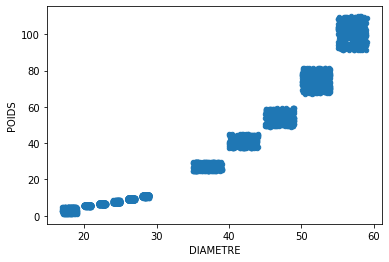

In [67]:
df.plot.scatter(x="DIAMETRE", y="POIDS" )
plt.show()

## Entraînement du modèle

In [69]:
from sklearn.cluster import KMeans

modele = KMeans(n_clusters=2)
modele.fit(df)

KMeans(n_clusters=2)

In [70]:
# prédiction
predictions_kmeans = modele.predict(df)

## Visualisation

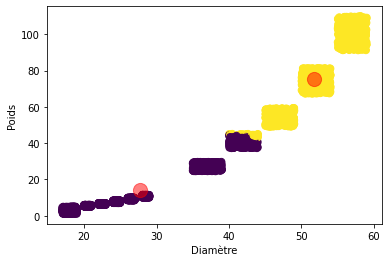

In [71]:
#Affichage de la clusterisation
plt.scatter(df.DIAMETRE, df.POIDS , c=predictions_kmeans , s=50, cmap= 'viridis' )
plt.xlabel("Diamètre")
plt.ylabel("Poids")

#Affichage des centroïdes
centers = modele.cluster_centers_
plt.scatter(centers[:, 0] , centers[:, 1 ], c='red', s=200 , alpha=0.5)
plt.show()

On constate une erreur dans la classification : des abricots sont devenus des cerises. Les nouvelles données sont perçues comme plus proche du cluster "cerise" que du cluster "abricot". Il peut être intéressant d'utiliser une autre méthode pour classifier correctement nos fruits.

## Algo GMM (Mélange gaussien) 

Permet de déterminer les différents clusters en séparant les données contenues dans les différentes courbes en forme de cloche (cf : visualisation en 3D).

L'algorithme détermine pour chaque cluster une moyenne et une variance, puis pour chaque observation il détermine une probabilité d'appartenir ou non à ce cluster.

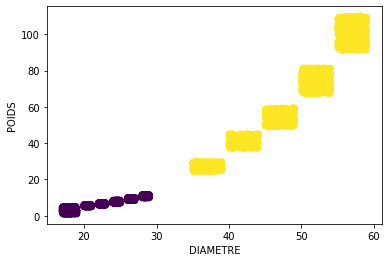

In [72]:
from sklearn import mixture

#Détermination des clusters (2 à trouver)
gmm = mixture . GaussianMixture(n_components=2)

#Apprentissage
gmm.fit(df)

#Classification
clusters = gmm.predict(df)

#Affichage des clusters
plt.scatter(df.DIAMETRE, df.POIDS , c=clusters , s=40 , cmap= 'viridis' ) ;
plt.xlabel ("DIAMETRE")
plt.ylabel("POIDS")
plt.show()

La clusterisation est plus pertinente : les abricots ont été bien identifés comme tels.

## Enregistrement du modèle

In [73]:
from joblib import dump

dump(modele, 'kmean_2.joblib')

['kmean_2.joblib']

---